<a href="https://colab.research.google.com/github/janakg/era-s5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
import os

# Define the repository and the target directory
repo_url = 'https://github.com/janakg/era-s5.git'
target_dir = '/content/era-s5'

# Check if the directory already exists
if not os.path.exists(target_dir):
    # If it doesn't exist, clone the repo
    !git clone {repo_url}
else:
    # If it exists, 'cd' into the directory and pull the latest changes
    %cd {target_dir}
    !git pull

# Add the repository's directory to the system path
import sys
sys.path.append(target_dir)

# Import all utils functions
from utils import *

Cloning into 'era-s5'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 48 (delta 23), reused 31 (delta 10), pack-reused 0
Receiving objects: 100% (48/48), 352.05 KiB | 4.57 MiB/s, done.
Resolving deltas: 100% (23/23), done.


CODE BLOCK: 2

In [3]:
# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

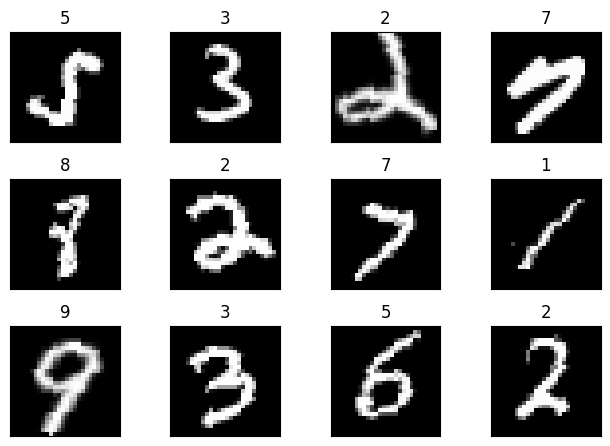

In [7]:
# Call the util function to show a batch of images
import matplotlib.pyplot as plt
fig = plt.figure()
show_batch_images(plt, train_loader, 12, 3, 4)

CODE BLOCK: 7

In [8]:
# model imported from a module
from model import Net

CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [10]:

# All utils are imported from utils.py module       

CODE BLOCK: 10

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_succeeded, train_processed, train_loss = train(model, device, train_loader, optimizer, criterion)
  train_acc.append(100 * train_succeeded/train_processed)
  train_losses.append(train_loss / len(train_loader))

  test_succeeded, test_loss = test(model, device, test_loader, criterion)
  test_acc.append(100. * test_succeeded / len(test_loader.dataset))
  test_losses.append(test_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.7994 Batch_id=117 Accuracy=31.20: 100%|██████████| 118/118 [00:16<00:00,  7.07it/s]


Test set: Average loss: 1.7295, Accuracy: 5717/10000 (57.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0819 Batch_id=117 Accuracy=86.74: 100%|██████████| 118/118 [00:10<00:00, 11.52it/s]


Test set: Average loss: 0.1318, Accuracy: 9558/10000 (95.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1704 Batch_id=117 Accuracy=95.36: 100%|██████████| 118/118 [00:10<00:00, 11.58it/s]


Test set: Average loss: 0.0790, Accuracy: 9752/10000 (97.52%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0506 Batch_id=117 Accuracy=96.51: 100%|██████████| 118/118 [00:10<00:00, 11.47it/s]


Test set: Average loss: 0.0660, Accuracy: 9787/10000 (97.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0789 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [00:10<00:00, 11.61it/s]


Test set: Average loss: 0.0544, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1157 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:10<00:00, 10.96it/s]


Test set: Average loss: 0.0503, Accuracy: 9833/10000 (98.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0187 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [00:10<00:00, 10.95it/s]


Test set: Average loss: 0.0395, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0834 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [00:10<00:00, 11.32it/s]


Test set: Average loss: 0.0368, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0556 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:10<00:00, 11.50it/s]


Test set: Average loss: 0.0476, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1294 Batch_id=117 Accuracy=98.12: 100%|██████████| 118/118 [00:10<00:00, 11.43it/s]


Test set: Average loss: 0.0316, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0591 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:10<00:00, 10.95it/s]


Test set: Average loss: 0.0297, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1891 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:10<00:00, 10.83it/s]


Test set: Average loss: 0.0296, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0264 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:10<00:00, 11.66it/s]


Test set: Average loss: 0.0325, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0231 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:10<00:00, 11.50it/s]


Test set: Average loss: 0.0298, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0196 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:10<00:00, 11.56it/s]


Test set: Average loss: 0.0267, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0474 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:10<00:00, 11.06it/s]


Test set: Average loss: 0.0227, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0106 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:11<00:00, 10.17it/s]


Test set: Average loss: 0.0224, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0102 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:10<00:00, 10.83it/s]


Test set: Average loss: 0.0214, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0099 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:10<00:00, 11.14it/s]


Test set: Average loss: 0.0216, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0339 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:11<00:00,  9.91it/s]


Test set: Average loss: 0.0217, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

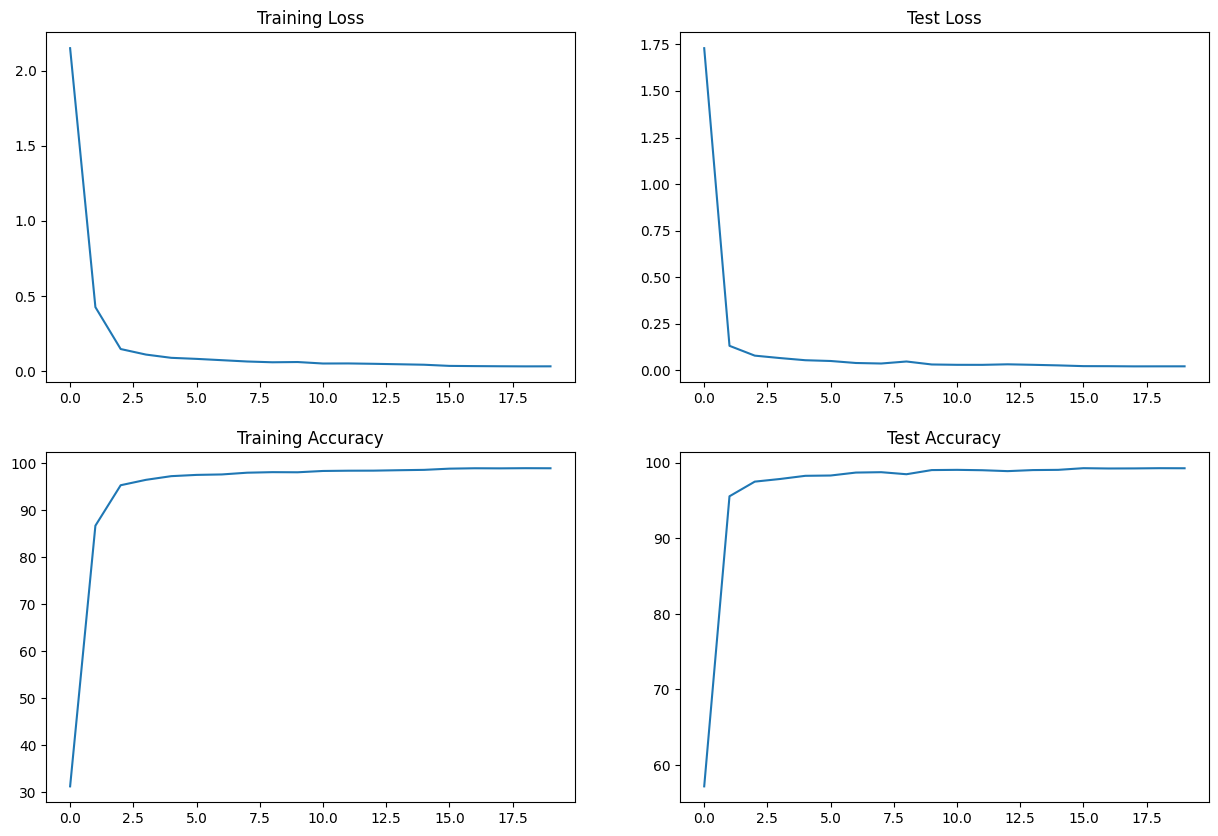

In [14]:
# Plots
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [13]:
!pip install torchsummary
from torchsummary import summary
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
